In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

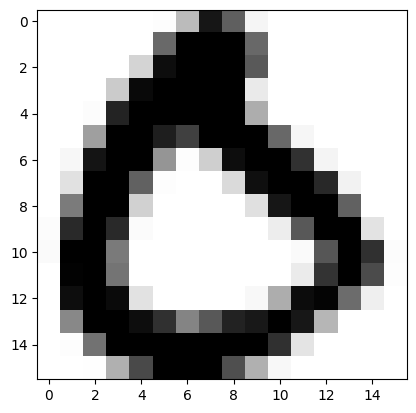

In [66]:
PATH = os.getcwd()
DATAPATH = os.path.join(PATH, "data")
filenames = {
    "X_test": "test_in - Copy.csv",
    "X_train": "train_in - Copy.csv",
    "y_test": "test_out - Copy.csv",
    "y_train": "train_out - Copy.csv",
}

X_test, y_test = pd.read_csv(os.path.join(DATAPATH, filenames["X_test"]), header=None), pd.read_csv(os.path.join(DATAPATH, filenames["y_test"]), header=None, names=["digit"])
X_train, y_train = pd.read_csv(os.path.join(DATAPATH, filenames["X_train"]), header=None), pd.read_csv(os.path.join(DATAPATH, filenames["y_train"]), header=None, names=["digit"])


plt.figure()
plt.imshow((X_test.iloc[0]).to_numpy().reshape((16,16)), cmap='Greys')
plt.show()

# Task 1

In [91]:
# 1i: find all training images that are for digit 'd' and calculate the centers

def center_img(X, y, digit: int):
    """Calculate the center of the cloud in 256 dim space for `digit`"""
    return X[y.digit == digit].mean()

def d(src, dst):
    """Calculate the distance between `src` and `dst` using norm 2 distance"""
    return ((src - dst)**2).sum()

def classify(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        
        distances = [d(img, center) for center in centers]
        output.append(np.argmin(distances))
    return np.array(output)

y_out = classify(X_test)

In [103]:
len(y_test[y_test.digit == y_out])/len(y_test)

0.804